In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params
from multi_group_dorm_simulation import MultiGroupDormSimulation

In [2]:
def init_dorm_sim(dorm_test_rate):
    return MultiGroupDormSimulation(
                num_dorms=1,
                dorm_population=100,
                non_dorm_population=0,
                intra_dorm_contacts=7.5, # 10 contacts/day within each dorm
                inter_dorm_contacts=5, #10 contacts/day with other people in dorms
                intra_non_dorm_contacts=3, # each person in a dorm has this many contacts/day with person not in a dorm
                inter_non_dorm_contacts=7.3, #contacts/day within non-dorm community
                dorm_test_rate=dorm_test_rate, # daily test rate within dorms
                non_dorm_test_rate=0.2, #daily test rate in non-dorm
                # set the following parameters to their non-quarantine counterparts
                quarantine_contacts_multiplier=1, # multiply contacts/day rates by this after dorm is quarantined
                quarantine_test_fraction=dorm_test_rate, # test fraction after dorm goes into quarantine
                dorm_outside_infection_p=0, # outside infections for people in dorms -- None means use default
                initial_dorm_prevalence = 0.01 # initial prevalence (percentage) in the dorms
    )

In [3]:
dorm_test_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

quarantine_trajectories = {}
dorm_sims = {}

import time

for test_rate in dorm_test_rates:
    print("starting test_rate {}".format(test_rate))
    quarantine_trajectories[test_rate] = []
    dorm_sims[test_rate] = []

    start_time = time.time()
    
    for _ in range(35):
        sim = init_dorm_sim(test_rate)
        quarantine_trajectories[test_rate].append(sim.run_new_trajectory(112))
        dorm_sims[test_rate].append(sim)
        print("done new trajectory")
        
    end_time = time.time()
    print("test_rate {} took {} time".format(test_rate, end_time - start_time))

starting test_rate 0.1
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
test_rate 0.1 took 130.13363242149353 time
starting test_rate 0.2
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new trajectory
done new tr

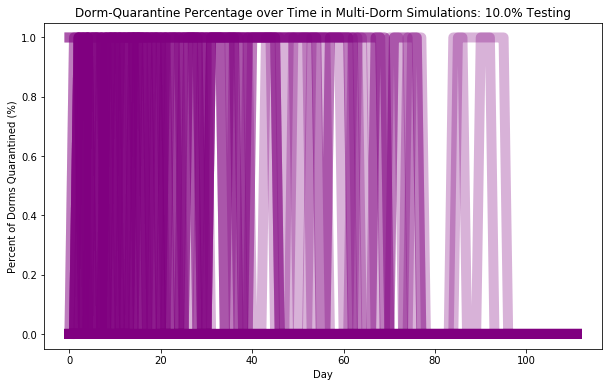

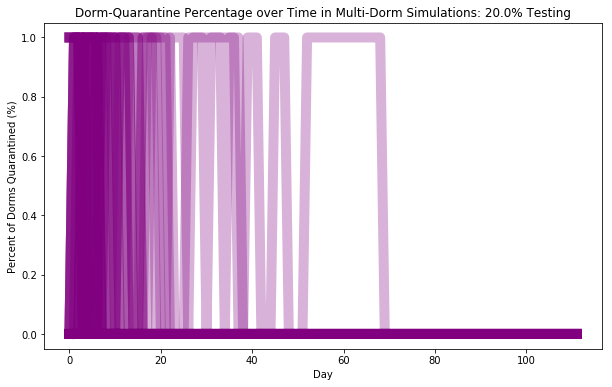

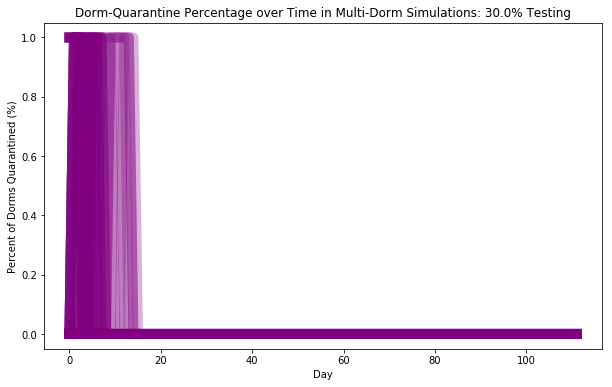

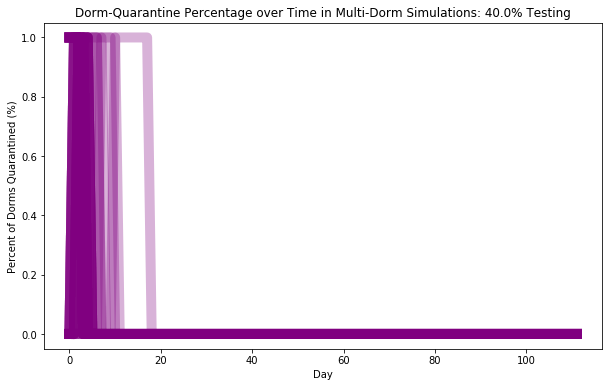

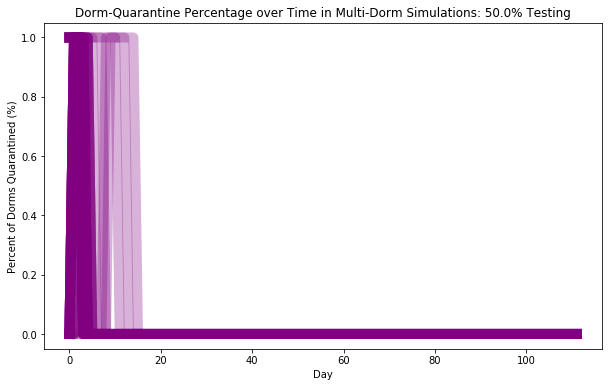

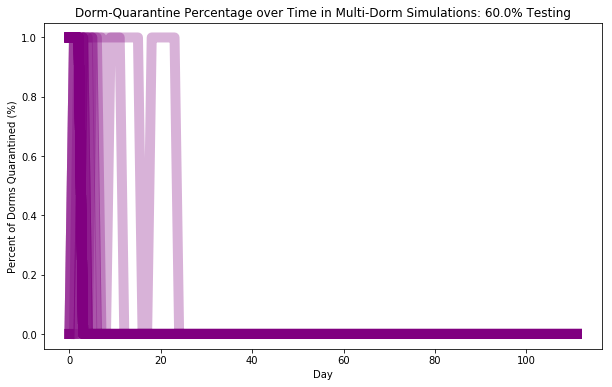

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_dorm_quarantines(cs, test_rate):
    xs = list(range(112))
    plt.figure(figsize=(10,6))
    for c in cs:
        plt.plot(xs, c, color='purple', alpha=0.3, linewidth=10)
    plt.xlabel("Day")
    plt.ylabel("Percent of Dorms Quarantined (%)")
    plt.title("Dorm-Quarantine Percentage over Time in Multi-Dorm Simulations: {}% Testing".format(test_rate*100))
    plt.show()

for test_rate in dorm_test_rates:
    plot_dorm_quarantines(quarantine_trajectories[test_rate], test_rate)

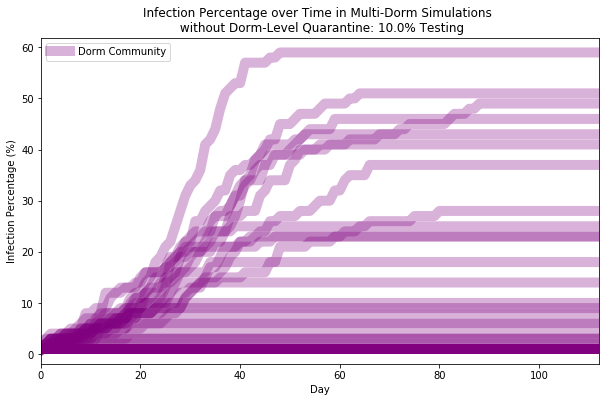

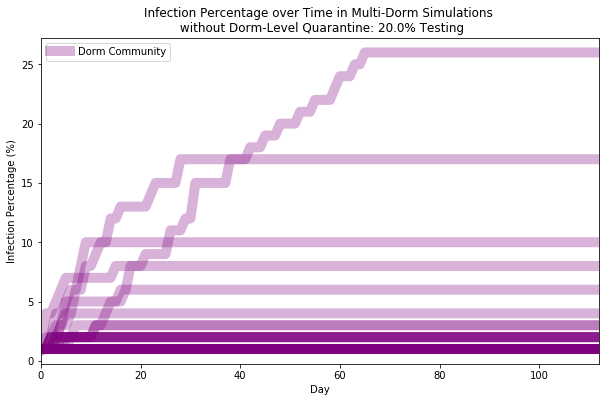

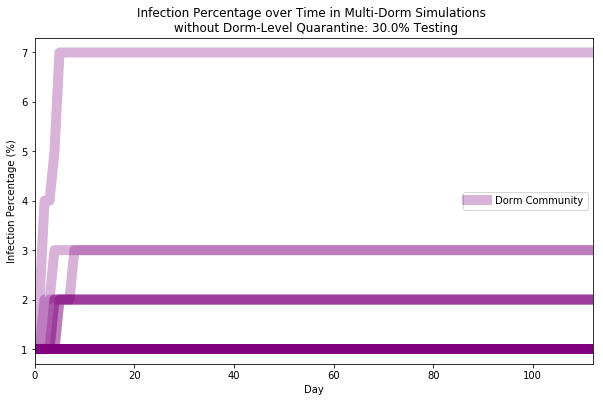

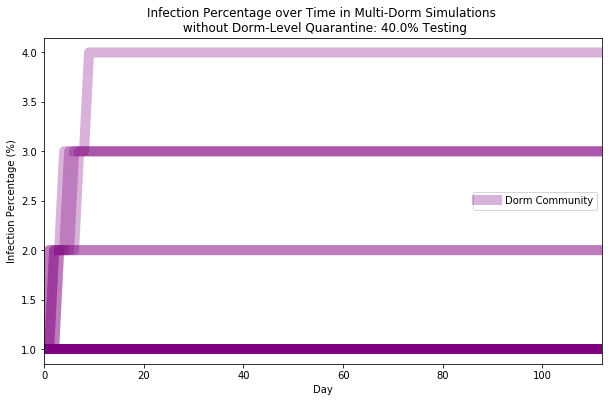

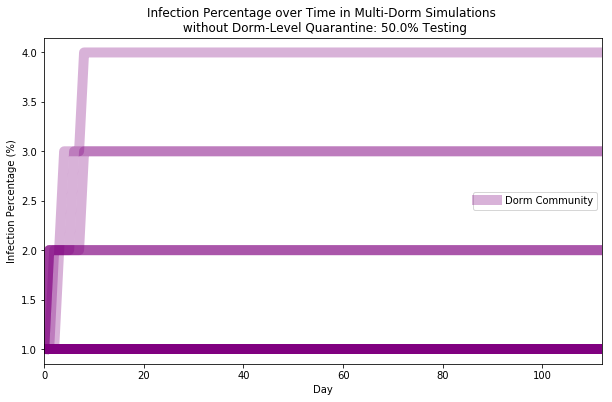

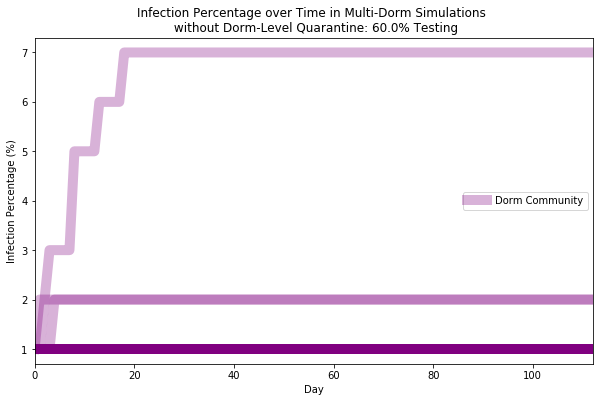

In [8]:
def get_popsize(df):
    cols = df.columns
    subdf = df[[col for col in cols if 'cumulative' not in col]]
    return subdf.sum(axis=1).iloc[0]

def infection_pct(df):
    popsize = get_popsize(df)
    
    subdf = df[['cumulative_mild', 'cumulative_severe']]
    infections = subdf.sum(axis=1).iloc[-1]
    
    return infections / popsize * 100

def add_df_plot(df, label, color, alpha=0.1, linewidth=10):
    popsize = get_popsize(df)
    df[['S', 'QS']].apply(lambda x: (popsize - sum(x)) / popsize * 100, axis=1) \
                        .plot(label=label, alpha=alpha, linewidth=linewidth, color=color)
        
import numpy as np

def plot_infections(dorm_sims, test_rate):
    plt.figure(figsize=(10,6))
    dorm_label='Dorm Community'
    non_dorm_label = 'Non-Dorm Community'
    for sim in dorm_sims:
        dorm_df = sim.sims[0].sim_df
        
        add_df_plot(dorm_df, label=dorm_label, color='purple', alpha=0.3, linewidth=10)
        dorm_label=''
        
    plt.xlabel("Day")
    plt.ylabel("Infection Percentage (%)")
    plt.legend()
    plt.title("Infection Percentage over Time in Multi-Dorm Simulations \n without Dorm-Level Quarantine: {}% Testing".format(test_rate * 100))
    plt.show()
for test_rate in dorm_test_rates:
    plot_infections(dorm_sims[test_rate], test_rate)

##### 